In [1]:
pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [3]:
# Load datasets
from ucimlrepo import fetch_ucirepo

# Fetch datasets
wine = fetch_ucirepo(id=109)
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X_wine = wine.data.features
y_wine = wine.data.targets

X_iris = iris.data.features
y_iris = iris.data.targets

# metadata
print(wine.metadata)
print(iris.metadata)

# variable information
print(wine.variables)
print(iris.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [4]:
# classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

In [5]:
# function to evaluate classifiers
def evaluate_classifier(X, y, classifier):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Test the classifier
    y_pred = classifier.predict(X_test)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall

In [6]:
# lists to store results
results_wine = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': []}
results_iris = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

In [10]:
# Evaluate classifiers on Wine dataset
for name, classifier in classifiers.items():
    accuracy, precision, recall = evaluate_classifier(X_wine, y_wine, classifier)
    results_wine['Classifier'].append(name)
    results_wine['Accuracy'].append(accuracy)
    results_wine['Precision'].append(precision)
    results_wine['Recall'].append(recall)

results_wine_df = pd.DataFrame(results_wine)
results_wine_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Classifier,Accuracy,Precision,Recall
0,Decision Tree,0.949153,0.950868,0.949153
1,Naive Bayes,1.000000,1.000000,1.000000
2,SVM,0.711864,0.715503,0.711864
3,Decision Tree,0.966102,0.968709,0.966102
4,Naive Bayes,1.000000,1.000000,1.000000
5,SVM,0.711864,0.715503,0.711864
6,Decision Tree,0.966102,0.966780,0.966102
7,Naive Bayes,1.000000,1.000000,1.000000
8,SVM,0.711864,0.715503,0.711864


In [11]:
# Evaluate classifiers on Iris dataset
for name, classifier in classifiers.items():
    accuracy, precision, recall = evaluate_classifier(X_iris, y_iris, classifier)
    results_iris['Classifier'].append(name)
    results_iris['Accuracy'].append(accuracy)
    results_iris['Precision'].append(precision)
    results_iris['Recall'].append(recall)

results_iris_df = pd.DataFrame(results_iris)
results_iris_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Classifier,Accuracy,Precision,Recall
0,Decision Tree,1.00,1.00,1.00
1,Naive Bayes,0.96,0.96,0.96
2,SVM,1.00,1.00,1.00
3,Decision Tree,1.00,1.00,1.00
4,Naive Bayes,0.96,0.96,0.96
5,SVM,1.00,1.00,1.00


Average Prediction Accuracy for Wine dataset:
Classifier
Decision Tree    0.960452
Naive Bayes      1.000000
SVM              0.711864
Name: Accuracy, dtype: float64

Average Precision for wine dataset:
Classifier
Decision Tree    0.962119
Naive Bayes      1.000000
SVM              0.715503
Name: Precision, dtype: float64

Average Recall for wine dataset:
Classifier
Decision Tree    0.960452
Naive Bayes      1.000000
SVM              0.711864
Name: Recall, dtype: float64


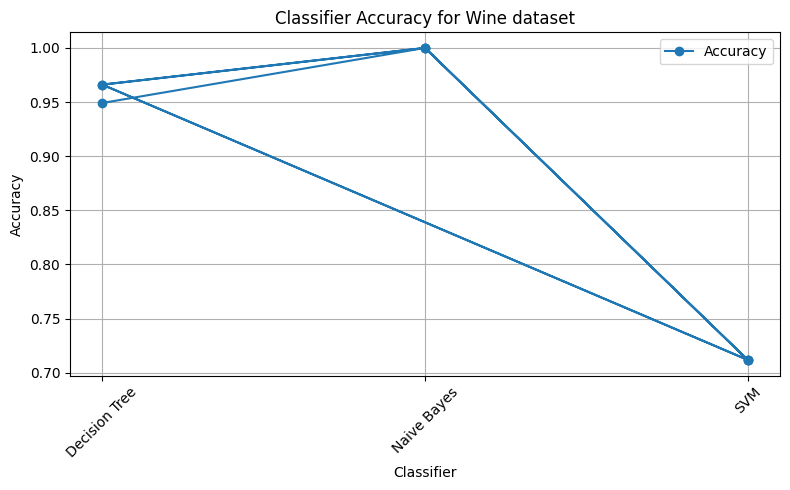

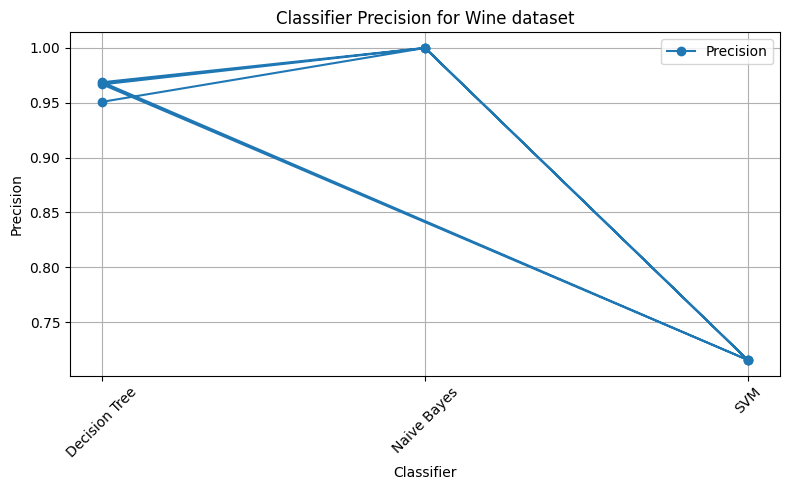

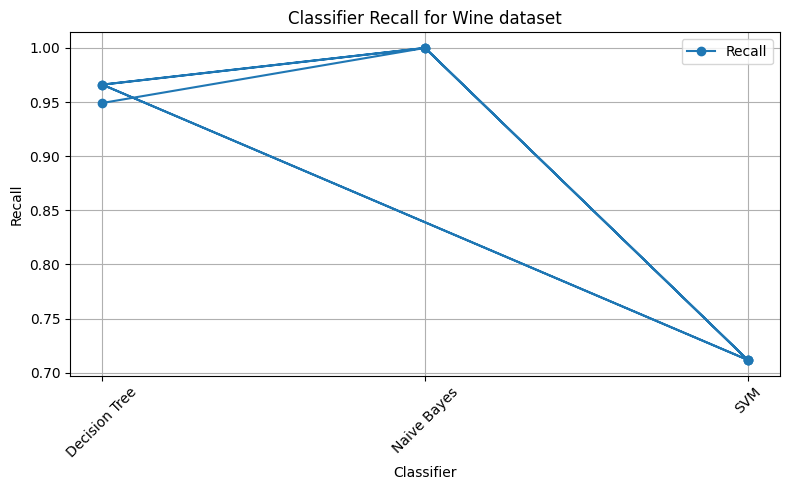

In [23]:
# average prediction accuracy and standard deviation
wine_avg_accuracy = results_wine_df.groupby('Classifier')['Accuracy'].mean()
wine_avg_precision = results_wine_df.groupby('Classifier')['Precision'].mean()
wine_avg_recall = results_wine_df.groupby('Classifier')['Recall'].mean()

# average prediction accuracy and standard deviation
print("Average Prediction Accuracy for Wine dataset:")
print(wine_avg_accuracy)
print("\nAverage Precision for wine dataset:")
print(wine_avg_precision)
print("\nAverage Recall for wine dataset:")
print(wine_avg_recall)

# results
for metric in ['Accuracy', 'Precision', 'Recall']:
    plt.figure(figsize=(8, 5))
    plt.plot(results_wine_df['Classifier'], results_wine_df[metric], marker='o', linestyle='-', label=metric)
    plt.title('Classifier '+metric+' for Wine dataset')
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Average Prediction Accuracy for iris dataset:
Classifier
Decision Tree    1.00
Naive Bayes      0.96
SVM              1.00
Name: Accuracy, dtype: float64

Average Precision for iris dataset:
Classifier
Decision Tree    1.00
Naive Bayes      0.96
SVM              1.00
Name: Precision, dtype: float64

Average Recall for iris dataset:
Classifier
Decision Tree    1.00
Naive Bayes      0.96
SVM              1.00
Name: Recall, dtype: float64


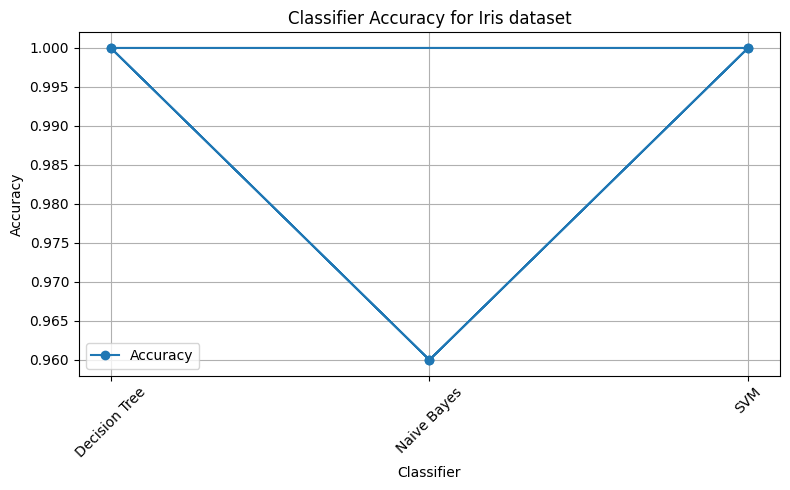

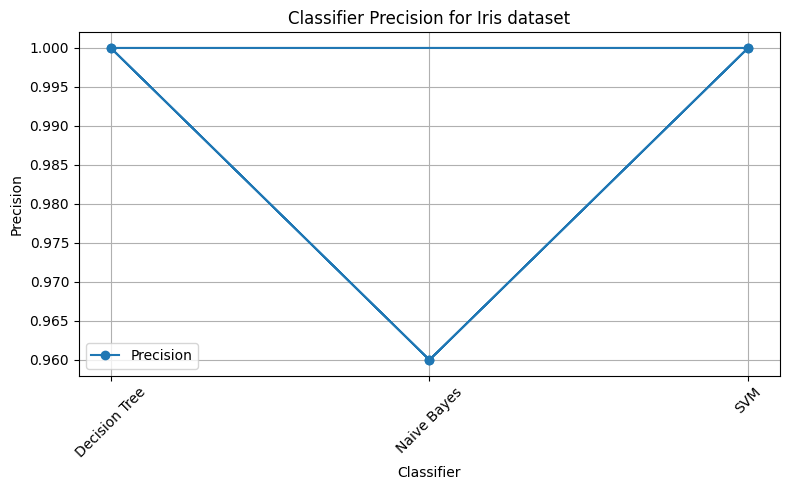

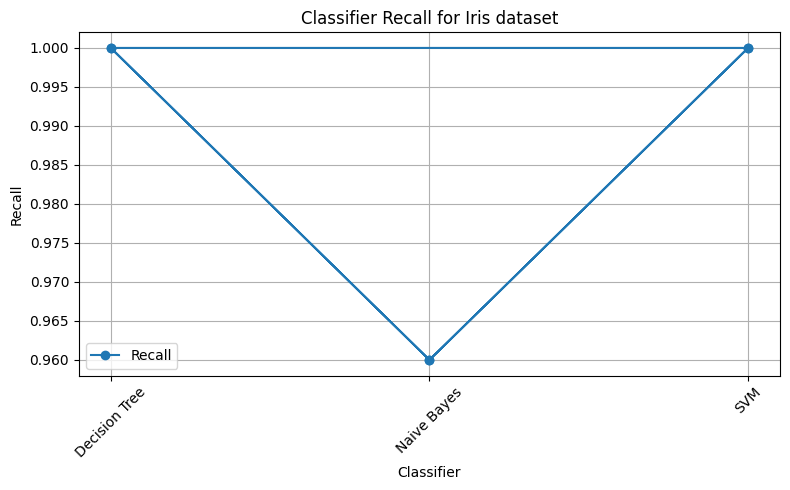

In [25]:
# average prediction accuracy and standard deviation
iris_avg_accuracy = results_iris_df.groupby('Classifier')['Accuracy'].mean()
iris_avg_precision = results_iris_df.groupby('Classifier')['Precision'].mean()
iris_avg_recall = results_iris_df.groupby('Classifier')['Recall'].mean()

# average prediction accuracy and standard deviation
print("Average Prediction Accuracy for iris dataset:")
print(iris_avg_accuracy)
print("\nAverage Precision for iris dataset:")
print(iris_avg_precision)
print("\nAverage Recall for iris dataset:")
print(iris_avg_recall)

# results
for metric in ['Accuracy', 'Precision', 'Recall']:
    plt.figure(figsize=(8, 5))
    plt.plot(results_iris_df['Classifier'], results_iris_df[metric], marker='o', linestyle='-', label=metric)
    plt.title('Classifier '+metric+' for Iris dataset')
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Average Prediction Accuracy for iris dataset:
Classifier
Decision Tree    1.00
Naive Bayes      0.96
SVM              1.00
Name: Accuracy, dtype: float64

Standard Deviation for iris dataset:
Classifier
Decision Tree   NaN
Naive Bayes     NaN
SVM             NaN
Name: Accuracy, dtype: float64


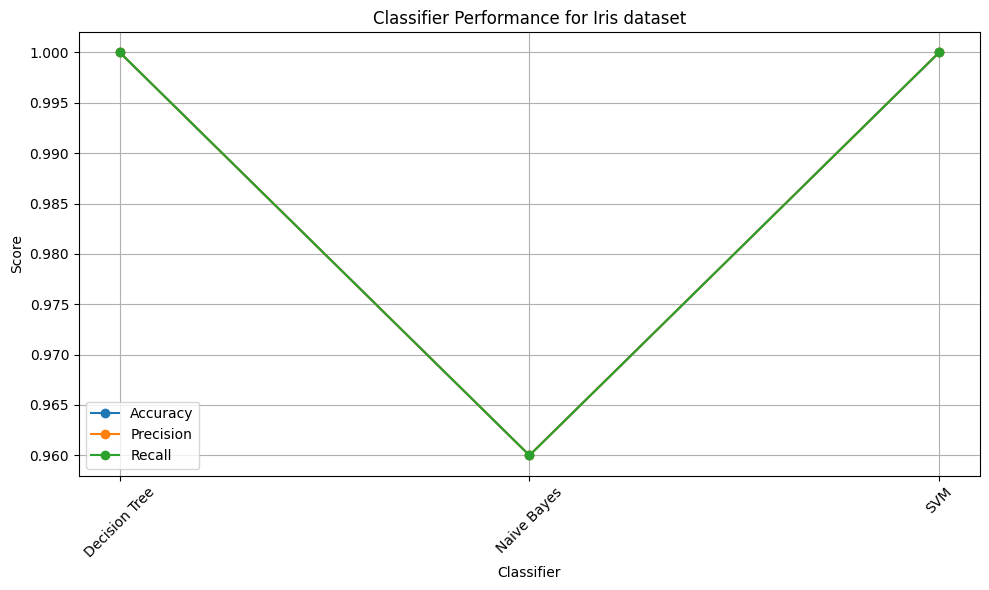

In [ ]:
# average prediction accuracy and standard deviation
iris_avg_accuracy = results_iris_df.groupby('Classifier')['Accuracy'].mean()
iris_std_deviation = results_iris_df.groupby('Classifier')['Accuracy'].std()

# Print average prediction accuracy and standard deviation
print("Average Prediction Accuracy for iris dataset:")
print(iris_avg_accuracy)
print("\nStandard Deviation for iris dataset:")
print(iris_std_deviation)

# Plot results
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall']:
    plt.plot(results_iris_df['Classifier'], results_iris_df[metric], marker='o', linestyle='-', label=metric)

plt.title('Classifier Performance for Iris dataset')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()